# Big Data Analytics
## KDD - Pré-processamento

<p><b>Objetivo: </b>Fazer a etapa de pré processamento no dataset<br>Autor: Seu Madruga<br>Data: 11/09/2001<br>Versão: NaN

In [7]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# carregar base de dados
dataset =  pd.read_csv('./dados.csv')

In [9]:
dataset

,BG,CLASS,SEVERITY,X,Y,RADIUS
0,G,CIRC,B,535.0,425.0,197.0
1,G,CIRC,B,522.0,280.0,69.0
2,D,NORM,NaN,NaN,NaN,NaN
3,D,NORM,NaN,NaN,NaN,NaN
4,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...
325,D,NORM,NaN,NaN,NaN,NaN
326,D,NORM,NaN,NaN,NaN,NaN
327,D,NORM,NaN,NaN,NaN,NaN
328,D,NORM,NaN,NaN,NaN,NaN


In [10]:
# Estatística Descritiva
dataset.describe()

,X,Y,RADIUS
count,119.000000,119.000000,119.000000
mean,488.605042,520.983193,48.848739
std,134.144131,178.828342,33.558863
min,127.000000,125.000000,3.000000
25%,398.500000,427.000000,27.000000
50%,505.000000,524.000000,41.000000
75%,574.500000,621.000000,61.500000
max,793.000000,994.000000,197.000000


In [11]:
# Quantidade de objetos para cada atributo SEVERITY
dataset['SEVERITY'].value_counts()

SEVERITY
B    69
M    54
Name: count, dtype: int64

In [12]:
# Quantidade de objetos para cada atributo BG
dataset['BG'].value_counts()

BG
D    117
F    109
G    104
Name: count, dtype: int64

In [13]:
# Quantidade de objetos para cada atributo CLASS
dataset['CLASS'].value_counts()

CLASS
NORM    207
CALC     30
CIRC     25
ARCH     19
SPIC     19
MISC     15
ASYM     15
Name: count, dtype: int64

<Axes: xlabel='BG', ylabel='count'>

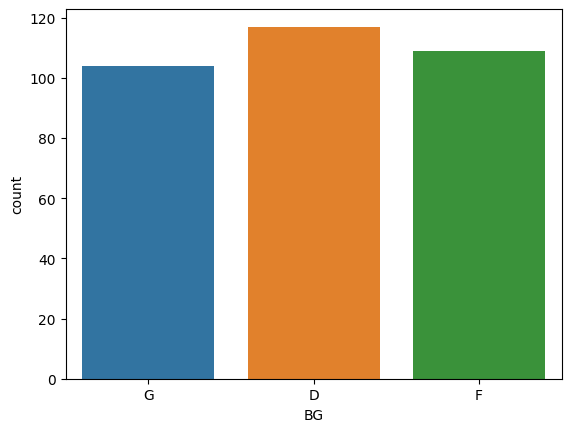

In [14]:
sns.countplot(x= dataset['BG'])

<Axes: xlabel='CLASS', ylabel='count'>

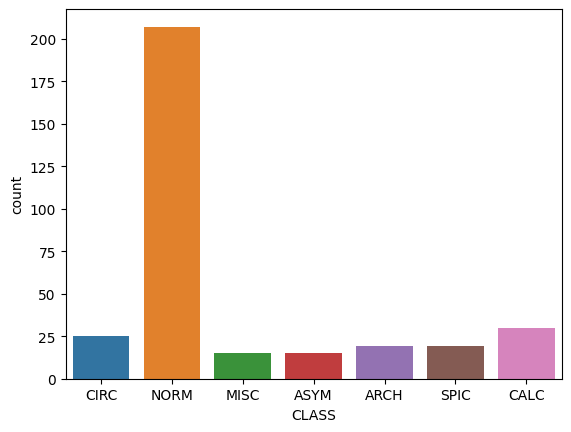

In [15]:
sns.countplot(x= dataset['CLASS'])

<Axes: xlabel='SEVERITY', ylabel='count'>

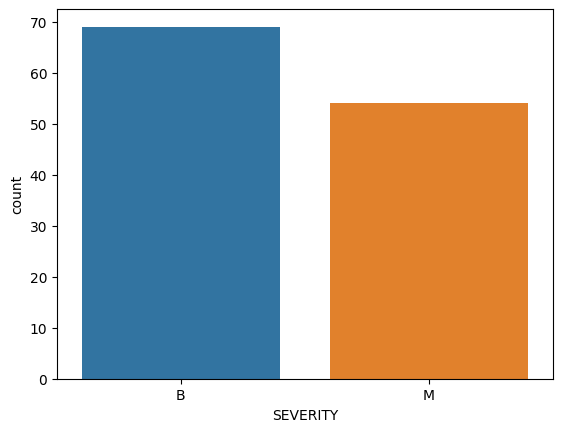

In [16]:
sns.countplot(x= dataset['SEVERITY'])

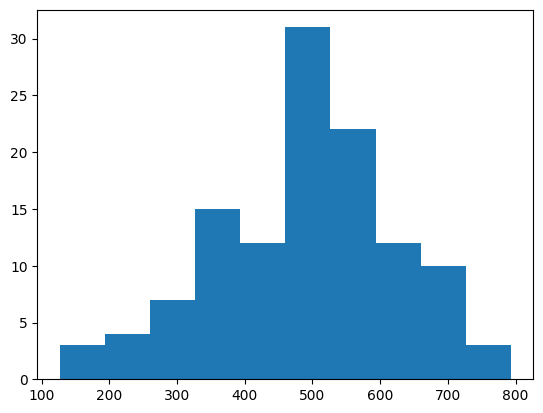

In [17]:
# Histograma de X
plt.hist(x = dataset['X']);

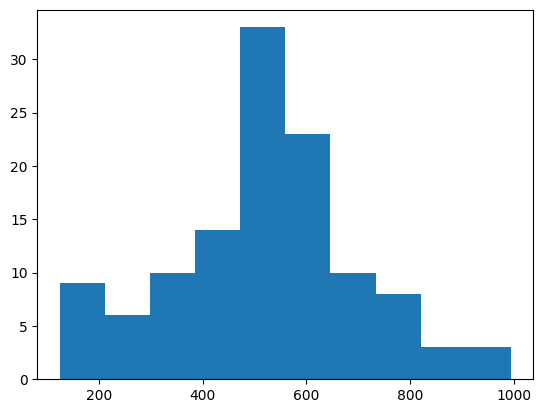

In [18]:
# Histograma de Y
plt.hist(x = dataset['Y']);

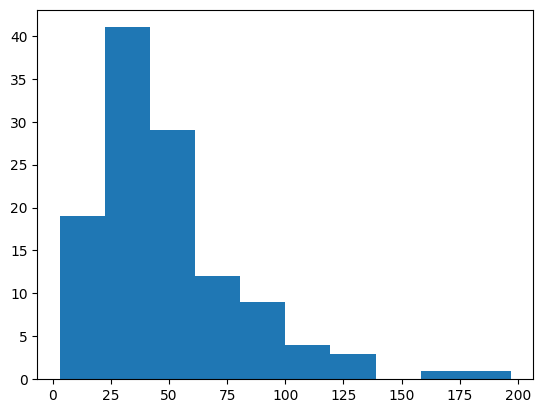

In [19]:
# Histograma de RADIUS
plt.hist(x = dataset['RADIUS']);

## Tratamento dos valores faltantes

In [20]:
# Verificar quantidade de valores faltantes
dataset.isnull().sum()

BG            0
CLASS         0
SEVERITY    207
X           211
Y           211
RADIUS      211
dtype: int64

In [21]:
# Criar um filtro com os objetos sem o dado de SEVERITY
filtro = dataset.loc[pd.isnull(dataset['SEVERITY'])]

In [22]:
# Aplicar o filtro, excluindo os objetos filtrados
dataset_filtrado = dataset.drop(list(filtro.index))

In [23]:
# Verificar quantidade de valores faltantes em cada atributo do dataset_filtrado
dataset_filtrado.isnull().sum()

BG          0
CLASS       0
SEVERITY    0
X           4
Y           4
RADIUS      4
dtype: int64

In [24]:
#localizar as 4 amostras com dados faltantes

dataset_filtrado.loc[pd.isnull(dataset_filtrado['X'])]

,BG,CLASS,SEVERITY,X,Y,RADIUS
59,F,CIRC,B,NaN,NaN,NaN
218,D,CALC,M,NaN,NaN,NaN
238,G,CALC,M,NaN,NaN,NaN
251,F,CALC,M,NaN,NaN,NaN


In [26]:
#OBTENDO AS MEDIAS DE X, y e radius
print("Media de x = ", dataset_filtrado['X'].mean())
print("Media de y = ", dataset_filtrado['Y'].mean())
print("Media de radius = ", dataset_filtrado['RADIUS'].mean())

Media de x =  488.60504201680675
Media de y =  520.9831932773109
Media de radius =  48.84873949579832


In [28]:
#completar os valores dos ausentes com a media de cada atributo
dataset_filtrado['X'].fillna(dataset_filtrado['X'].mean(), inplace=True)
dataset_filtrado['Y'].fillna(dataset_filtrado['Y'].mean(), inplace=True)
dataset_filtrado['RADIUS'].fillna(dataset_filtrado['RADIUS'].mean(), inplace=True)

In [29]:
dataset_filtrado

,BG,CLASS,SEVERITY,X,Y,RADIUS
0,G,CIRC,B,535.0,425.0,197.0
1,G,CIRC,B,522.0,280.0,69.0
4,F,CIRC,B,477.0,133.0,30.0
5,F,CIRC,B,500.0,168.0,26.0
10,F,CIRC,B,525.0,425.0,33.0
...,...,...,...,...,...,...
281,F,MISC,M,127.0,505.0,123.0
297,D,CIRC,B,337.0,353.0,45.0
319,F,MISC,B,240.0,263.0,20.0
321,F,MISC,B,518.0,191.0,39.0


In [30]:
#localizar as 4 amostras com dados faltantes
dataset_filtrado.loc[pd.isnull(dataset_filtrado['X'])] #vai mostrar que nao tem mais nenhum valor ausente no x

,BG,CLASS,SEVERITY,X,Y,RADIUS


In [31]:
dataset.describe()

,X,Y,RADIUS
count,119.000000,119.000000,119.000000
mean,488.605042,520.983193,48.848739
std,134.144131,178.828342,33.558863
min,127.000000,125.000000,3.000000
25%,398.500000,427.000000,27.000000
50%,505.000000,524.000000,41.000000
75%,574.500000,621.000000,61.500000
max,793.000000,994.000000,197.000000


<Axes: xlabel='BG', ylabel='count'>

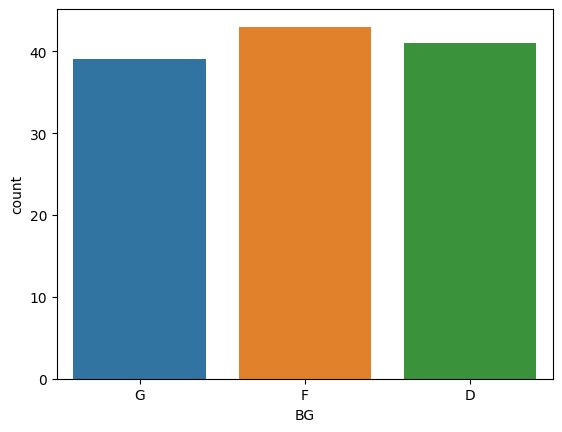

In [32]:
sns.countplot(x= dataset_filtrado['BG'])

<Axes: xlabel='CLASS', ylabel='count'>

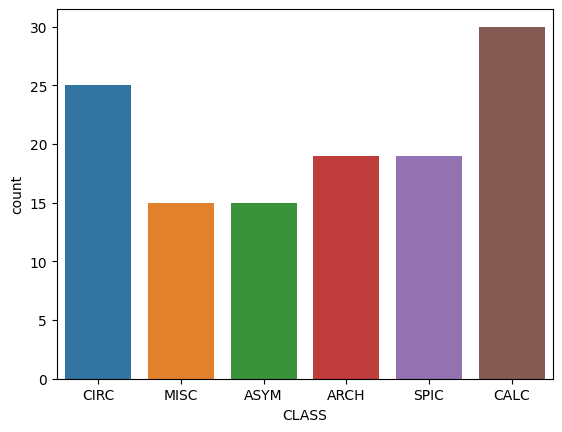

In [34]:
sns.countplot(x= dataset_filtrado['CLASS'])

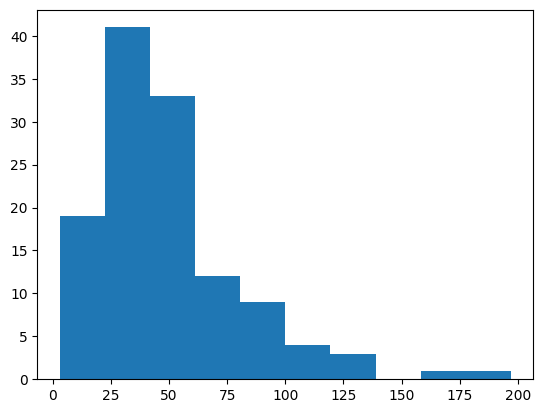

In [35]:
#histograma do radius
plt.hist(x = dataset_filtrado['RADIUS']);

In [37]:
#sera que os nodulos com maior raio tendem a ser malignos?
dataset_filtrado_M = dataset_filtrado.loc[dataset_filtrado['SEVERITY'] == 'M']
dataset_filtrado_B = dataset_filtrado.loc[dataset_filtrado['SEVERITY'] == 'B']

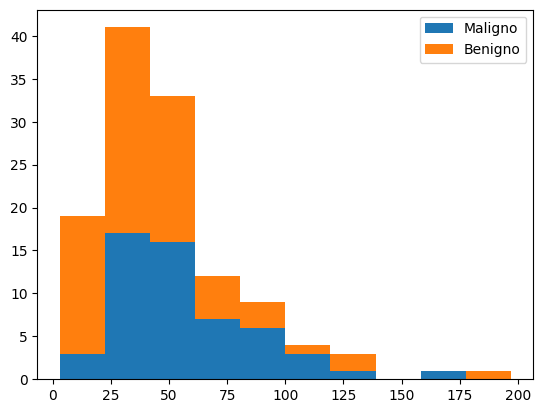

In [41]:
plt.hist(x = [dataset_filtrado_M['RADIUS'], dataset_filtrado_B['RADIUS']], label=['Maligno', 'Benigno'],histtype='bar', stacked=True);
plt.legend();
plt.show();

In [46]:
pd.qcut(dataset_filtrado['RADIUS'], q=3).value_counts()

RADIUS
(30.667, 50.0]     42
(2.999, 30.667]    41
(50.0, 197.0]      40
Name: count, dtype: int64

In [58]:
#aplicando no dataset
bins_label_RADIUS = ['bento', 'medio', 'grande']
dataset_filtrado['cat_radius'] = pd.qcut(dataset_filtrado['RADIUS'], q=3, labels=bins_label_RADIUS)

In [59]:
dataset_filtrado.head()

,BG,CLASS,SEVERITY,X,Y,RADIUS,cat_radius
0,G,CIRC,B,535.0,425.0,197.0,grande
1,G,CIRC,B,522.0,280.0,69.0,grande
4,F,CIRC,B,477.0,133.0,30.0,bento
5,F,CIRC,B,500.0,168.0,26.0,bento
10,F,CIRC,B,525.0,425.0,33.0,medio


In [66]:
#plicando no dataset o x e o y juntos
bins_label_x = ['direita', 'centro', 'esquerda']
dataset_filtrado['cat_x'] = pd.qcut(dataset_filtrado['X'], q=3, labels=bins_label_x)

In [67]:
dataset_filtrado.head()

,BG,CLASS,SEVERITY,X,Y,RADIUS,cat_radius,cat_x,cat_x_y
0,G,CIRC,B,535.0,425.0,197.0,grande,centro,medio
1,G,CIRC,B,522.0,280.0,69.0,grande,centro,medio
4,F,CIRC,B,477.0,133.0,30.0,bento,centro,medio
5,F,CIRC,B,500.0,168.0,26.0,bento,centro,medio
10,F,CIRC,B,525.0,425.0,33.0,medio,centro,medio
